## Visualize the Dataset

Pandas and Matplotlib is used to visualize the data

- `data.head()` is used to show the first 5 rows of the DataFrame
- `data.types` show the datatype of the column used
- visualize the data by using matplotlib to show the histogram

   Gender  Age  Height(cm)  Weight(kg) Family_history Alcohol Junk_food  \
0  Female   42       172.2        82.9             no     low       yes   
1  Female   19       175.3        80.0            yes    none       yes   
2  Female   43       158.3        81.9            yes    none       yes   
3  Female   23       165.0        70.0            yes     low        no   
4    Male   23       169.0        75.0            yes     low       yes   

   Vege_day  Meals_day      Snack Smoking  Water_intake(L) Transportation  \
0         3          3  Sometimes      no             2.72            car   
1         2          1  Sometimes      no             2.65            bus   
2         3          1  Sometimes      no             1.89            car   
3         2          1  Sometimes      no             2.00            bus   
4         3          3  Sometimes      no             2.82            bus   

   Exercise        TV  Income Discipline Cardiovascular_risk(y)  
0         3      rar

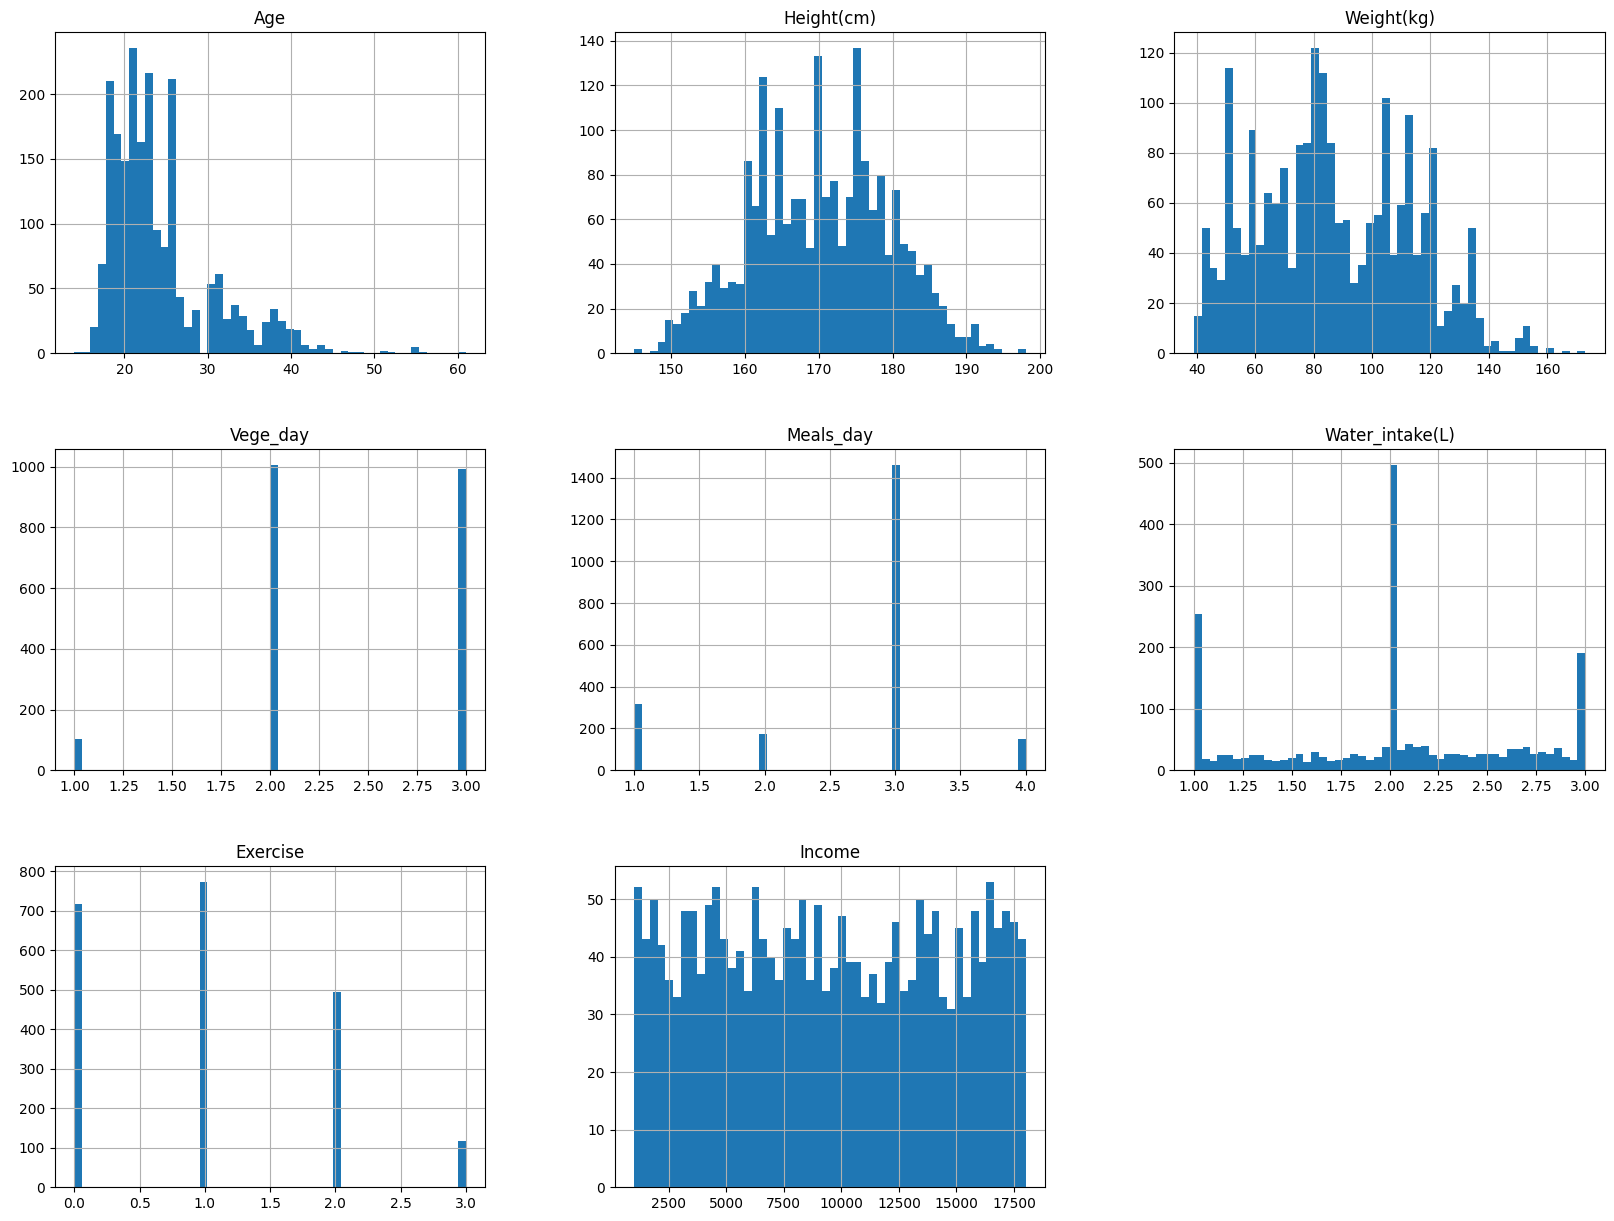

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('dataset.csv')

# Display the first few rows and summary of the dataset to understand its structure
print(data.head())
# Display the datatype used
print(data.dtypes)

# Visualize the data by histogram
data.hist(bins=50, figsize=(20,15))
plt.show()

## Perform Preprocessing

- Seperating the features and the target variable
    - Cardiovascular_risk is what we want to predict so seperating it out
- Encoding the target variable (y)
    - convert the target variable y into numerical values
- Performing preprocessing for categorical and numerical columns
    - Using One Hot Encoder to convert categorical variables into one-hot encoded binary vector
    - Perform Standard Scalar to the numerical data
    - Define preprocessors for nominal and ordinal data
- Splitting dataset into 80% of traning set and 20% testing set
    - Show the shape of the dataset

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separating features and the target column
X = data.drop(columns=['Cardiovascular_risk(y)'])
y = data['Cardiovascular_risk(y)']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Identify nominal and ordinal columns
# Assuming 'Gender' and 'Transportation' are nominal, and 'TV' is ordinal
nominal_cols = ['Gender', 'Transportation']
ordinal_cols = ['TV']  # Modify this based on your dataset

# Define the order for ordinal encoding
ordinal_categories = [['rare', 'moderate', 'often']]  # Adjust the order to match your data

# Define preprocessors for nominal and ordinal data
categorical_preprocessor_nominal = OneHotEncoder(handle_unknown='ignore')
categorical_preprocessor_ordinal = OrdinalEncoder(categories=ordinal_categories)

# Standardize numerical columns
numerical_cols = X.select_dtypes(include=[np.number]).columns
numerical_preprocessor = StandardScaler()

# Bundle preprocessing for numerical, nominal, and ordinal data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_cols),
        ('nom', categorical_preprocessor_nominal, nominal_cols),
        ('ord', categorical_preprocessor_ordinal, ordinal_cols)
    ])

# Apply the preprocessing pipeline
X_preprocessed = preprocessor.fit_transform(X)

# Splitting the dataset into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_encoded, test_size=0.2, random_state=42)

# Show the shape of the dataset
print('Full set shape =', X.shape)
print('Train shape =', X_train.shape)
print('Test shape =', X_test.shape)


Full set shape = (2100, 17)
Train shape = (1680, 16)
Test shape = (420, 16)


# Tuning and Training the model

- Manually tuning the hyperparameters of the Random Forest Classifier
- Training the tuned Model

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Perform manual tuning on key hyperparameters
rf_model_tuned = RandomForestClassifier(
    n_estimators=200,  # Set the number of tree 200
    max_depth=20,      # Setting a reasonable max depth to prevent overfitting
    min_samples_split=5,  # Requires at least 5 samples to split an internal node
    min_samples_leaf=2,   # Requires at least 2 samples at a leaf node
    bootstrap=True,       # Using bootstrap sampling
    random_state=42
)

# Train the tuned model
rf_model_tuned.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

# Validate the performance

- Perform 5-flod cross validation on the training set
- Make prefiction on the traning set and testing set
- Validate the Model Performance by checking the accuracy
- Compute a confusion matrix to show the summary of predict result
- Show the value of precision, reccall and f1 score

In [4]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Perform 5 fold cross-validation on the training set
cv_scores = cross_val_score(rf_model_tuned, X_train, y_train, cv=5, scoring='accuracy')

# Train the tuned model on the full training data
rf_model_tuned.fit(X_train, y_train)

# Predict on the training set with the tuned model
y_train_pred_tuned = rf_model_tuned.predict(X_train)

# Predict on the test set with the tuned model
y_pred_final_tuned = rf_model_tuned.predict(X_test)

# Validate the model's performance on the training set
train_accuracy_tuned = accuracy_score(y_train, y_train_pred_tuned)
train_conf_matrix_tuned = confusion_matrix(y_train, y_train_pred_tuned)
train_class_report_tuned = classification_report(y_train, y_train_pred_tuned, target_names=label_encoder.classes_)

# Validate the model's performance on the test set
final_accuracy_tuned = accuracy_score(y_test, y_pred_final_tuned)
final_conf_matrix_tuned = confusion_matrix(y_test, y_pred_final_tuned)
final_class_report_tuned = classification_report(y_test, y_pred_final_tuned, target_names=label_encoder.classes_)

# Output results
print(f'Cross-validation accuracy scores: {[f"{score:.4f}" for score in cv_scores]}')
print('Mean cross-validation accuracy: {:.4f}'.format(np.mean(cv_scores)))
print()
print(f'Training set accuracy score: {train_accuracy_tuned:.4f}')
print()
print('Training set confusion matrix:')
print(train_conf_matrix_tuned)
print()
print('Training set classification report:')
print(train_class_report_tuned)
print()
print(f'Test set accuracy score: {final_accuracy_tuned:.4f}')
print()
print('Test set confusion matrix:')
print(final_conf_matrix_tuned)
print()
print('Test set classification report:')
print(final_class_report_tuned)



Cross-validation accuracy scores: ['0.9702', '0.9762', '0.9643', '0.9554', '0.9762']
Mean cross-validation accuracy: 0.9685

Training set accuracy score: 0.9994

Training set confusion matrix:
[[787   0   0]
 [  0 438   1]
 [  0   0 454]]

Training set classification report:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00       787
         low       1.00      1.00      1.00       439
      medium       1.00      1.00      1.00       454

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680


Test set accuracy score: 0.9690

Test set confusion matrix:
[[179   0   1]
 [  0 111   7]
 [  1   4 117]]

Test set classification report:
              precision    recall  f1-score   support

        high       0.99      0.99      0.99       180
         low       0.97      0.94      0.95       118
      medium       0.94      0.96      0

# Matrix Heatmap

- Visualize the confusion matrix using heatmap

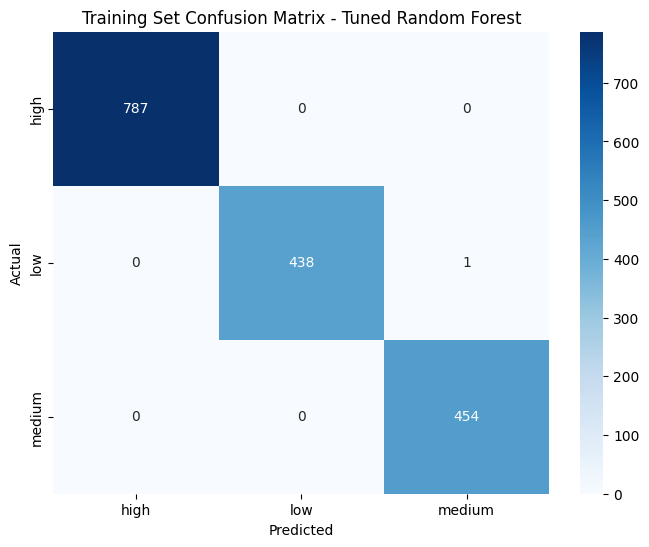

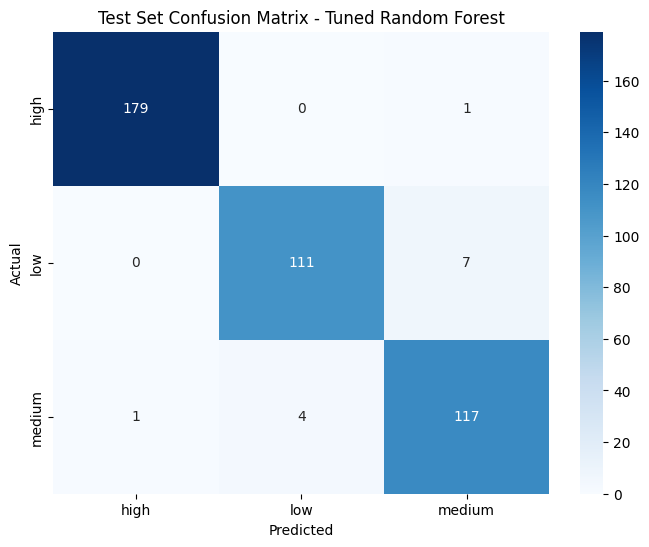

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Display Confusion Matrix Heatmap for Training Set
plt.figure(figsize=(8, 6))
sns.heatmap(train_conf_matrix_tuned, annot=True, fmt="d", cmap="Blues", 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Training Set Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 2. Display Confusion Matrix Heatmap for Test Set
plt.figure(figsize=(8, 6))
sns.heatmap(final_conf_matrix_tuned, annot=True, fmt="d", cmap="Blues", 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Test Set Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# Plot the feature importance

- Plot the top 10 features

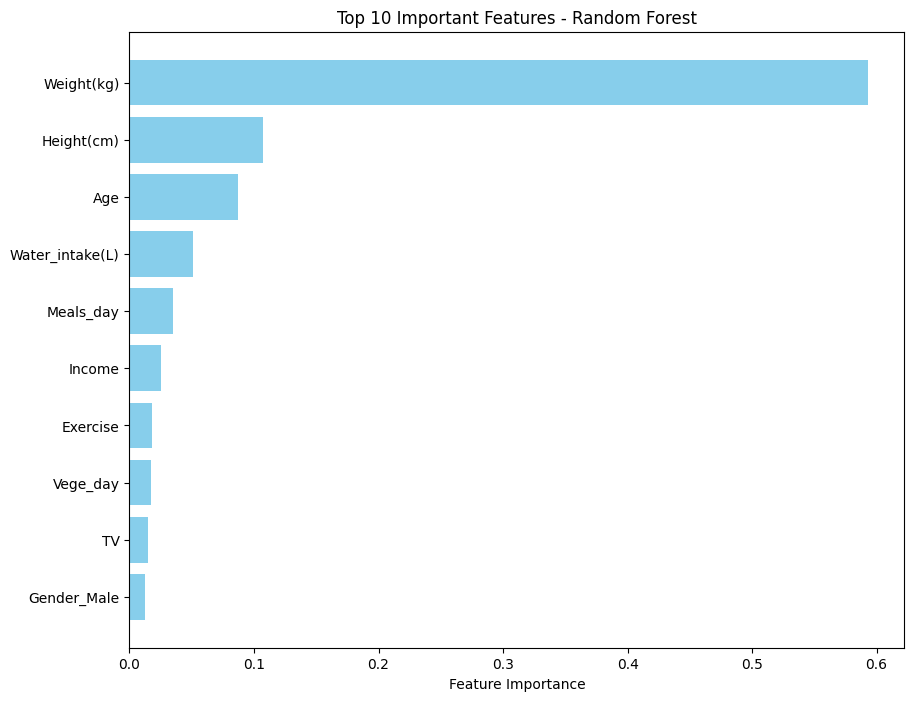

In [6]:
import matplotlib.pyplot as plt
import numpy as np

numerical_feature_names = numerical_cols  
onehot_feature_names = preprocessor.named_transformers_['nom'].get_feature_names_out(nominal_cols)  # Get nominal feature names
ordinal_feature_names = ordinal_cols 

# Combine all feature names
all_feature_names = np.concatenate([numerical_feature_names, onehot_feature_names, ordinal_feature_names])

# Get feature importances from the RandomForestClassifier model
feature_importances = rf_model_tuned.feature_importances_

# Sort features by importance ranking
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_features = all_feature_names[sorted_indices]

# Plot the top 10 features
plt.figure(figsize=(10, 8))
plt.barh(sorted_features[:10], sorted_importances[:10], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features - Random Forest")
plt.gca().invert_yaxis()
plt.show()
